In [8]:
from farPoint import bcdPoints
import numpy as np
from two_step import two_step_overland
import bezeir_fit as bf

ie0 = 60.0
ie1 = 200.0
ie2 = 120.0
ToC = 460.

ca = two_step_overland(ie0, ie1, ie2, 100.0, 201, 0.5, 0.1, 0.01)
ca.ie1_duration(ToC)
ca.run()

SDC = np.array(bcdPoints(ca))
SDC[:, 0] = (SDC[:, 0] - SDC[0, 0])/(SDC[-1, 0] - SDC[0, 0])
SDC[:, 1] = SDC[:, 1]/SDC[0, 1]
SDC[:, 2] = SDC[:, 2]/SDC[0, 2]
            
newSDC = np.zeros([21, 2])
t = np.arange(0., 1.0001, 1./20)
newSDC[:, 0] = np.interp(t, SDC[:, 0], SDC[:, 1])
newSDC[:, 1] = np.interp(t, SDC[:, 0], SDC[:, 2])

[p,t] = bf.fit(newSDC, 2, 1.0E-8)

ie0=60.00
ie1=200.00
ie2=120.00
ToC=460.00


In [9]:
SDC

array([[0.        , 1.        , 1.        ],
       [0.00138313, 1.00014677, 0.99983131],
       [0.00276625, 1.00029365, 0.99966415],
       ...,
       [0.99723375, 1.0191923 , 0.8680791 ],
       [0.99861687, 1.01858039, 0.86790415],
       [1.        , 1.01635442, 0.86777565]])

In [12]:
t = np.arange(0., 1.0001, 1./100.)
newSDC = bf.gen(t, 2, p)

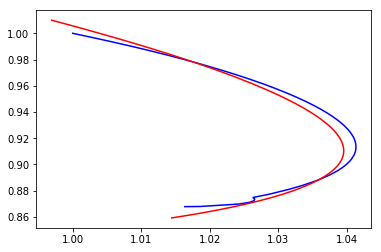

In [14]:
import matplotlib.pyplot as plt
plt.plot(SDC[:, 1], SDC[:, 2], '-b')
plt.plot(newSDC[:, 0], newSDC[:, 1], '-r')

ie0=30.00
ie1=100.00
ie2=60.00
ToC=560.00
(1.0375107483150314, 0.8725345975002644)


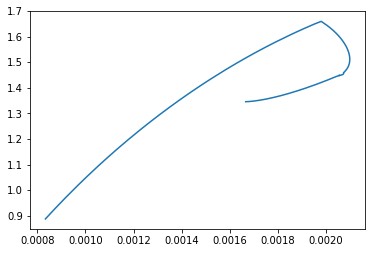

In [22]:
ie0 = 30.0
ie1 = 100.0
ie2 = 60.0
ToC = 560.

ca = two_step_overland(ie0, ie1, ie2, 100.0, 201, 0.5, 0.1, 0.01)
ca.ie1_duration(ToC)
ca.run()

SDC = np.array(bcdPoints(ca))
print(SDC[-1][1]/SDC[0][1], SDC[-1][2]/SDC[0][2])

plt.close()
plt.plot(ca.q_curve[:, 1], ca.s_curve[:, 1])